# CRISPR Prime Editing Guide RNA Design for Tay Sachs Disease 

# Importing Required Dependencies

In [1]:
import Bio

Module Bio:

- Biopython is the largest and most popular bioinformatics package for Python. It contains a number of different sub-modules for common bioinformatics tasks. It is developed by Chapman and Chang, mainly written in Python. It also contains C code to optimize the complex computation part of the software.

In [2]:
from Bio.Seq import Seq

Library Seq:

- The Seq object provides a number of string like methods (such as count, find, split and strip), which are alphabet aware where appropriate.


- In addition to the string like sequence, the Seq object has an alphabet property. This is an instance of an Alphabet class from Bio.Alphabet, for example generic DNA, or IUPAC DNA. This describes the type of molecule (e.g. RNA, DNA, protein) and may also indicate the expected symbols (letters).


- The Seq object also provides some biological methods, such as complement, reverse_complement, transcribe, back_transcribe and translate (which are not applicable to sequences with a protein alphabet).

In [3]:
from Bio import SeqIO

Library SeqIO:

- Bio.SeqIO provides a simple uniform interface to input and output assorted sequence file formats (including multiple sequence alignments), but will only deal with sequences as SeqRecord objects.

In [4]:
from Bio import pairwise2

Library pairwise2:

- This provides functions to get global and local alignments between two sequences. A global alignment finds the best concordance between all characters in two sequences. A local alignment finds just the subsequences that align the best. 

In [5]:
import matplotlib.pyplot as plt

Library matplotlib.pyplot:

- matplotlib.pyplot is a collection of functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

In [6]:
import re

Module re:

- This module provides regular expression matching operations similar to those found in Perl.Both patterns and strings to be searched can be Unicode strings (str) as well as 8-bit strings (bytes). However, Unicode strings and 8-bit strings cannot be mixed: that is, you cannot match a Unicode string with a byte pattern or vice-versa; similarly, when asking for a substitution, the replacement string must be of the same type as both the pattern and the search string.

In [7]:
import py3Dmol

Module py3Dmol:

- The widget is completely static, which means the viewer doesn’t need a running IPython kernel to be useful and web pages and presentations generated from the notebook will work as expected. However, this also means there is only one-way communication between the notebook and the viewer.

In [8]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

Module Warning :
- Warning messages are typically issued in situations where it is useful to alert the user of some condition in a program, where that condition (normally) doesn’t warrant raising an exception and terminating the program. For example, one might want to issue a warning when a program uses an obsolete module.


sub - module : 

Simplifier:
- Simplifies warnings

In [9]:
import pandas as pd

Pandas is used to analyze data

In [10]:
from sklearn.preprocessing import LabelEncoder

Encode target labels with value between 0 and n_classes-1.

This transformer should be used to encode target values, i.e. y, and not the input X.

In [11]:
from sklearn.model_selection import train_test_split

Split arrays or matrices into random train and test subsets.

In [12]:
from sklearn.preprocessing import StandardScaler

Standardize features by removing the mean and scaling to unit variance.

In [13]:
from sklearn.metrics import accuracy_score

Predicting Model Accuracy

In [14]:
from sklearn.metrics import f1_score

The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

F1 = 2 * (precision * recall) / (precision + recall)

In [15]:
import seaborn as sn

Seaborn is a library that uses Matplotlib underneath to plot graphs. It will be used to visualize random distributions.

In [16]:
from sklearn.linear_model import LogisticRegression

This Library is used for Regression Analysis

In [17]:
from sklearn.neighbors import KNeighborsClassifier

Fit the k-nearest neighbors classifier from the training dataset.

In [18]:
from sklearn.svm import SVC

The fit time scales at least quadratically with the number of samples and may be impractical beyond tens of thousands of samples. 

In [19]:
from sklearn.naive_bayes import GaussianNB

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. 

In [20]:
from sklearn.tree import DecisionTreeClassifier

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

In [21]:
from sklearn.ensemble import RandomForestClassifier

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting.

## Prediction of Tay - Sachs

Importing Dataset

In [22]:
data = pd.read_csv("C:/Users/harih/Documents/College-AIE/Sem 3/Bio/Project/Prediction/taysachs_final.csv")

Display first 5 rows of the dataset

In [23]:
data.head(5)

,ID,Diagnosis,Location,Allele Change,Mutation-Type
0,100728,Malignant,151266820,0,1
1,1332717,Malignant,72345527,0,1
2,1210422,Malignant,72351189,1,6
3,1192227,Malignant,72345419,0,1
4,1172730,Benign,72353011,1,6


Display total number of rows and columns in the dataset

In [24]:
data.shape

(441, 5)

Statistical description of the data

In [25]:
data.describe()

,ID,Location,Allele Change,Mutation-Type
count,4.410000e+02,4.410000e+02,441.000000,441.000000
mean,6.410076e+05,7.253834e+07,4.716553,5.433107
std,3.770603e+05,3.759200e+06,3.675338,1.504748
min,3.884000e+03,7.234345e+07,0.000000,1.000000
25%,3.711690e+05,7.234663e+07,1.000000,6.000000
50%,5.564160e+05,7.235053e+07,5.000000,6.000000
75%,1.037233e+06,7.235560e+07,7.000000,6.000000
max,1.332717e+06,1.512668e+08,12.000000,6.000000


Check for null values in the dataset 

In [26]:
data.isnull().sum()
data.isna().sum()

ID               0
Diagnosis        0
Location         0
Allele Change    0
Mutation-Type    0
dtype: int64

Understand the target varibale further

In [27]:
data["Diagnosis"].value_counts()

Malignant    231
Benign       210
Name: Diagnosis, dtype: int64

Visualize dataset using Histograms

A histogram is a plot that lets you discover, and show, the underlying frequency distribution 

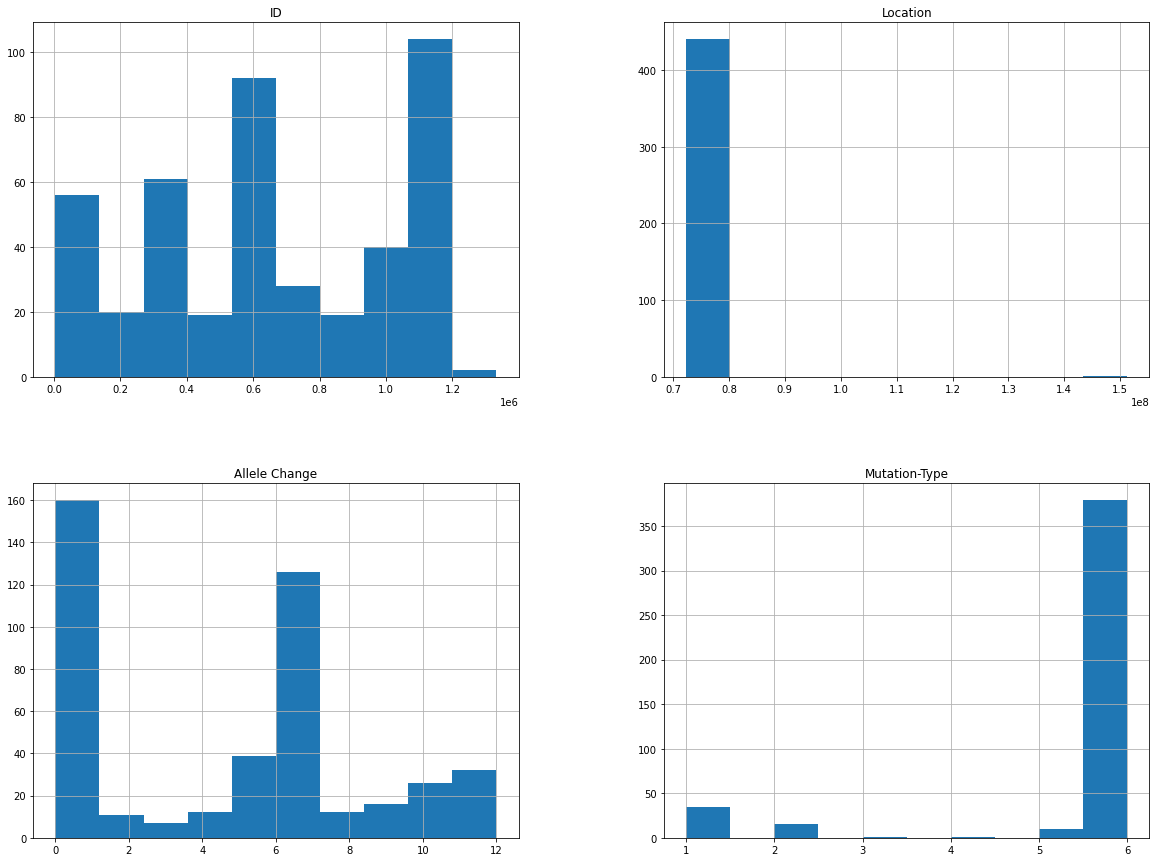

In [28]:
num_bins = 10
data.hist(bins=num_bins, figsize=(20,15))
plt.show()

Assign independent variables (input variables) to X

In [29]:
X = data.iloc[:, 2:].values

In [30]:
X.shape

(441, 3)

Assign target variable to Y. Here, target variable is "diagnosis" which is in position 1

In [31]:
Y = data.iloc[:, 1].values

In [32]:
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)
Y

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,

Split the dataset into 75% train and 25% test data

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

Standardizing the features using StandardScaler

In [34]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
classifier_1= LogisticRegression(random_state = 0)

Training the model

In [36]:
classifier_1.fit(X_train, Y_train)

LogisticRegression(random_state=0)

Testing the Model

In [37]:
Y_pred1 = classifier_1.predict(X_test)

Evaluating our model

0.6306306306306306


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

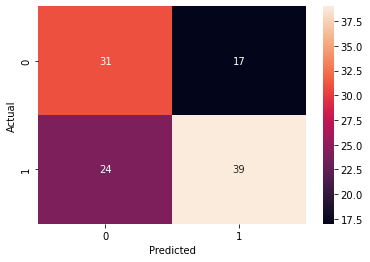

In [38]:
print (accuracy_score(Y_test, Y_pred1))
confusion_matrix = pd.crosstab(Y_test, Y_pred1, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [39]:
classifier_2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_2.fit(X_train, Y_train)
Y_pred2 = classifier_2.predict(X_test)

0.5855855855855856


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

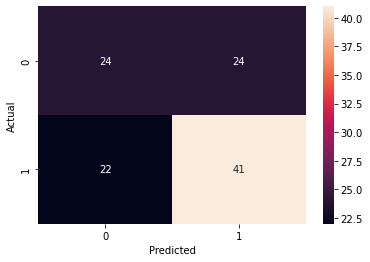

In [40]:
print (accuracy_score(Y_test, Y_pred2))
confusion_matrix = pd.crosstab(Y_test, Y_pred2, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [41]:
classifier_3 = SVC(kernel = 'linear', random_state = 0)
classifier_3.fit(X_train, Y_train)
Y_pred3 = classifier_3.predict(X_test)

0.5585585585585585


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

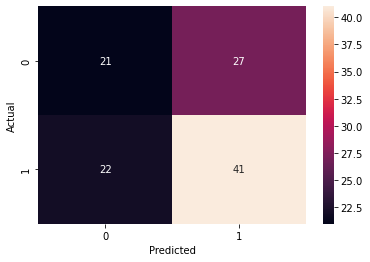

In [42]:
print (accuracy_score(Y_test, Y_pred3))
confusion_matrix = pd.crosstab(Y_test, Y_pred3, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [43]:
classifier_4 = SVC(kernel = 'rbf', random_state = 0)
classifier_4.fit(X_train, Y_train)
Y_pred4 = classifier_4.predict(X_test)

0.6306306306306306


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

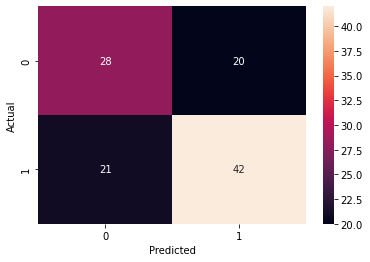

In [44]:
print (accuracy_score(Y_test, Y_pred4))
confusion_matrix = pd.crosstab(Y_test, Y_pred4, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [45]:
classifier_5 = GaussianNB()
classifier_5.fit(X_train, Y_train)
Y_pred5 = classifier_5.predict(X_test)

0.45045045045045046


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

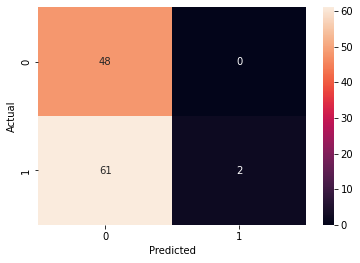

In [46]:
print (accuracy_score(Y_test, Y_pred5))
confusion_matrix = pd.crosstab(Y_test, Y_pred5, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [47]:
classifier_6 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_6.fit(X_train, Y_train)
Y_pred6 = classifier_6.predict(X_test)

0.5945945945945946


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

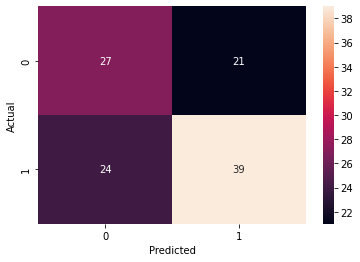

In [48]:
print (accuracy_score(Y_test, Y_pred6))
confusion_matrix = pd.crosstab(Y_test, Y_pred6, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [49]:
classifier_7 = RandomForestClassifier(n_estimators = 15, criterion = 'entropy', random_state = 0)
classifier_7.fit(X_train, Y_train)
Y_pred7 = classifier_7.predict(X_test)

0.5855855855855856


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

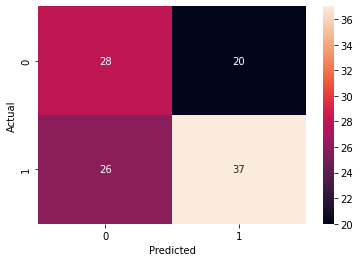

In [50]:
print (accuracy_score(Y_test, Y_pred7))
confusion_matrix = pd.crosstab(Y_test, Y_pred7, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

#  Reading the DNA Sequence

In [51]:
for record in SeqIO.parse("C:/Users/harih/Documents/College-AIE/Sem 3/Bio/Project/Iteration -1/sequence.fasta","fasta"):
    print(record.id)
    print(record.description)

NC_000015.10:c72376014-72340924
NC_000015.10:c72376014-72340924 Homo sapiens chromosome 15, GRCh38.p14 Primary Assembly


In [52]:
print(record)

ID: NC_000015.10:c72376014-72340924
Name: NC_000015.10:c72376014-72340924
Description: NC_000015.10:c72376014-72340924 Homo sapiens chromosome 15, GRCh38.p14 Primary Assembly
Number of features: 0
Seq('CTCACGTGGCCAGCCCCCTCCGAGAGGGGAGACCAGCGGGCCATGACAAGCTCC...GTA')


In [53]:
hexA_dna= SeqIO.read("C:/Users/harih/Documents/College-AIE/Sem 3/Bio/Project/Iteration -1/sequence.fasta","fasta")

In [54]:
print(hexA_dna)

ID: NC_000015.10:c72376014-72340924
Name: NC_000015.10:c72376014-72340924
Description: NC_000015.10:c72376014-72340924 Homo sapiens chromosome 15, GRCh38.p14 Primary Assembly
Number of features: 0
Seq('CTCACGTGGCCAGCCCCCTCCGAGAGGGGAGACCAGCGGGCCATGACAAGCTCC...GTA')


The length of the Hex - A gene

In [55]:
len(hexA_dna)

35091

The nucleotide frequency of the DNA sequence

In [56]:
bases= {"A": 0, "T":0, "G":0, "C":0}
for i in hexA_dna:
    if(i=="A"):
        bases["A"] +=1
    elif(i=="T"):
        bases["T"] +=1
    elif(i=="G"):
        bases["G"] +=1
    elif(i=="C"):
        bases["C"] +=1
    
    else:
        pass
print("Nucleotide freq. of HEXA is: ",bases)

Nucleotide freq. of HEXA is:  {'A': 9378, 'T': 9730, 'G': 8746, 'C': 7237}


<BarContainer object of 4 artists>

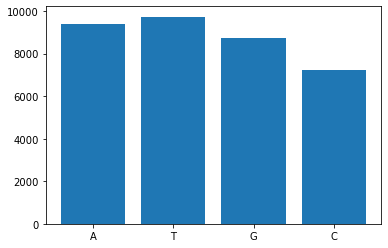

In [57]:
plt.bar(bases.keys(),bases.values())

+ Secondly, we are determining to target zone benefit benchling visualzing software. The target zone include our all mutations.  

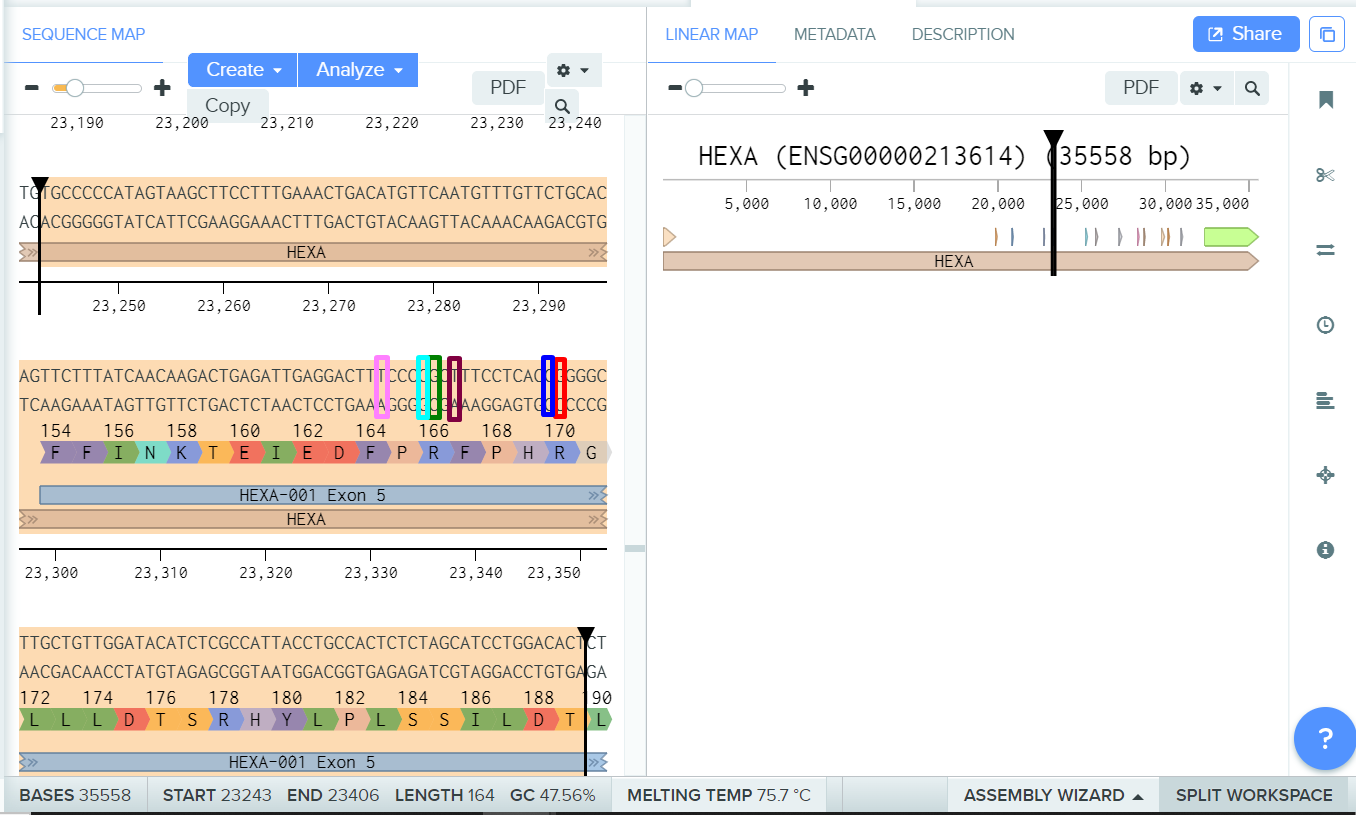

##### Pink is 492T>G, turquoise is 496del , green is 497G>A, claret red is 499T>G, blue is 508C>T and red is 509G>A mutation.

In [58]:
# The target zone for CRISPR-PE system
target= hexA_dna[22530:23360]

In [59]:
print(target)

ID: NC_000015.10:c72376014-72340924
Name: NC_000015.10:c72376014-72340924
Description: NC_000015.10:c72376014-72340924 Homo sapiens chromosome 15, GRCh38.p14 Primary Assembly
Number of features: 0
Seq('CATTTAGTAATGACCTTGAGGCCACACTGCTTTGAAGAAAATAAACTATGTTAA...TAA')


### As the third step; we are finding PAM sequence (NGG) and then we are designing our pegRNA sequences. 

In [60]:
def findPAM_seq(sequence):
    
    if str("GG") in sequence:
        for startmatch in re.finditer("GG",sequence):
            remaining= sequence[startmatch.start():]
            print("+",remaining,"---")

In [61]:
target1_mutation_sequence= "CATTTAGTAATGACCTTGAGGCCACACTGCTTTGAAGAAAATAAACTATGTTAACAGGAAAATCCAGAATTTGTAGGCTGAGTGGTGTTTGGGACAGTTGTATTAGGCTGGCGTTGGACAATTGCTCTCTGGGAAGGTGGCTGCTTATGGTCATTTATAGAGGTGGGGAGCATTTAGGGAGAGAGCGACCCTGAGAACAGTCACAGATTGGCTTTTTAAGAATCCTGGGAGAGTTGTCTTCATCTCCCTGTGCCCCCATAGTAAGCTTCCTTTGAAACTGACATGTTCAATGTTTGTTCTGCACAGTTCTTTATCAACAAGACTGAGATTGAGGACTT*cCCCCGCTTTCCTCAC*tGGGGCTTGCTGTTGGATACATCTCGCCATTACCTGCCACTCTCTAGCATCCTGGACACTCTGGTAACCAGGCCTTAAGGCCTTCTTCACACTTAAGAGTTCTAGGGTGATGGAGCAACGGACAGACCAAGTTCCAAATTCTTAAAGAGTTAGAGAGGGAATGTATGGACTGGGTGTGGTGGCTCATGCCTGTAATCCCAA"

In [62]:
findPAM_seq(target1_mutation_sequence)

+ GGCCACACTGCTTTGAAGAAAATAAACTATGTTAACAGGAAAATCCAGAATTTGTAGGCTGAGTGGTGTTTGGGACAGTTGTATTAGGCTGGCGTTGGACAATTGCTCTCTGGGAAGGTGGCTGCTTATGGTCATTTATAGAGGTGGGGAGCATTTAGGGAGAGAGCGACCCTGAGAACAGTCACAGATTGGCTTTTTAAGAATCCTGGGAGAGTTGTCTTCATCTCCCTGTGCCCCCATAGTAAGCTTCCTTTGAAACTGACATGTTCAATGTTTGTTCTGCACAGTTCTTTATCAACAAGACTGAGATTGAGGACTT*cCCCCGCTTTCCTCAC*tGGGGCTTGCTGTTGGATACATCTCGCCATTACCTGCCACTCTCTAGCATCCTGGACACTCTGGTAACCAGGCCTTAAGGCCTTCTTCACACTTAAGAGTTCTAGGGTGATGGAGCAACGGACAGACCAAGTTCCAAATTCTTAAAGAGTTAGAGAGGGAATGTATGGACTGGGTGTGGTGGCTCATGCCTGTAATCCCAA ---
+ GGAAAATCCAGAATTTGTAGGCTGAGTGGTGTTTGGGACAGTTGTATTAGGCTGGCGTTGGACAATTGCTCTCTGGGAAGGTGGCTGCTTATGGTCATTTATAGAGGTGGGGAGCATTTAGGGAGAGAGCGACCCTGAGAACAGTCACAGATTGGCTTTTTAAGAATCCTGGGAGAGTTGTCTTCATCTCCCTGTGCCCCCATAGTAAGCTTCCTTTGAAACTGACATGTTCAATGTTTGTTCTGCACAGTTCTTTATCAACAAGACTGAGATTGAGGACTT*cCCCCGCTTTCCTCAC*tGGGGCTTGCTGTTGGATACATCTCGCCATTACCTGCCACTCTCTAGCATCCTGGACACTCTGGTAACCAGGCCTTAAGGCCTTCTTCACACTTAAGAGTTCTAGGGTGATGGAGCAACGGACAGACCAAGTTCCAAATTCTTAAAGAGTTAG

In [63]:
findPAM_seq(target1_mutation_sequence[::-1])

+ GGTGGTGTGGGTCAGGTATGTAAGGGAGAGATTGAGAAATTCTTAAACCTTGAACCAGACAGGCAACGAGGTAGTGGGATCTTGAGAATTCACACTTCTTCCGGAATTCCGGACCAATGGTCTCACAGGTCCTACGATCTCTCACCGTCCATTACCGCTCTACATAGGTTGTCGTTCGGGGt*CACTCCTTTCGCCCCc*TTCAGGAGTTAGAGTCAGAACAACTATTTCTTGACACGTCTTGTTTGTAACTTGTACAGTCAAAGTTTCCTTCGAATGATACCCCCGTGTCCCTCTACTTCTGTTGAGAGGGTCCTAAGAATTTTTCGGTTAGACACTGACAAGAGTCCCAGCGAGAGAGGGATTTACGAGGGGTGGAGATATTTACTGGTATTCGTCGGTGGAAGGGTCTCTCGTTAACAGGTTGCGGTCGGATTATGTTGACAGGGTTTGTGGTGAGTCGGATGTTTAAGACCTAAAAGGACAATTGTATCAAATAAAAGAAGTTTCGTCACACCGGAGTTCCAGTAATGATTTAC ---
+ GGTGTGGGTCAGGTATGTAAGGGAGAGATTGAGAAATTCTTAAACCTTGAACCAGACAGGCAACGAGGTAGTGGGATCTTGAGAATTCACACTTCTTCCGGAATTCCGGACCAATGGTCTCACAGGTCCTACGATCTCTCACCGTCCATTACCGCTCTACATAGGTTGTCGTTCGGGGt*CACTCCTTTCGCCCCc*TTCAGGAGTTAGAGTCAGAACAACTATTTCTTGACACGTCTTGTTTGTAACTTGTACAGTCAAAGTTTCCTTCGAATGATACCCCCGTGTCCCTCTACTTCTGTTGAGAGGGTCCTAAGAATTTTTCGGTTAGACACTGACAAGAGTCCCAGCGAGAGAGGGATTTACGAGGGGTGGAGATATTTACTGGTATTCGTCGGTGGAAGGGTCTCTCGTTAACAGGTTGCGGTCGGATTATGTTGACAGGGTTTGTGGT

In [64]:
# Our pegRNA CRISPR sequence (for c492T>C mutation)
pegRNA_spacer= "AGCCCCGGTGAGGAAAGCGG"
rt_template= "TTGAGGACTTtCCCCG"
PBS= "CTTTCCTCACCGGGGCTT"
scaffold= "TTTTAGAGCTAGAAATAGCAAGTTAAAATAAGGCTAGTCCGTTATCAACTTGAAAAAGTGGCACCGAGTCGGTGC"

In [65]:
pegRNA1=pegRNA_spacer+scaffold+rt_template+PBS

In [66]:
print(pegRNA1)

AGCCCCGGTGAGGAAAGCGGTTTTAGAGCTAGAAATAGCAAGTTAAAATAAGGCTAGTCCGTTATCAACTTGAAAAAGTGGCACCGAGTCGGTGCTTGAGGACTTtCCCCGCTTTCCTCACCGGGGCTT


In [67]:
# Our pegRNA sequence (for c496del mutation)
pegRNA_spacer= "AGCCCCGGTGAGGAAAGCGG"
rt_template= "TGAGGACTTTcCCCGCT"
PBS= "TTCCTCACCGGGGCTT"
scaffold= "GTTTTAGAGCTAGAAATAGCAAGTTAAAATAAGGCTAGTCCGTTATCAACTTGAAAAAGTGGCACCGAGTCGGTGCT"

In [68]:
pegRNA2= pegRNA_spacer +scaffold+rt_template+PBS

In [69]:
print(pegRNA2)

AGCCCCGGTGAGGAAAGCGGGTTTTAGAGCTAGAAATAGCAAGTTAAAATAAGGCTAGTCCGTTATCAACTTGAAAAAGTGGCACCGAGTCGGTGCTTGAGGACTTTcCCCGCTTTCCTCACCGGGGCTT


In [70]:
# Our pegRNA sequence (for c497G>A mutation)
pegRNA_spacer= "AAGCCCCGGTGAGGAAAGtG"
rt_template= "GACTTTCCCCgC"
PBS= "TTTCCTCACCGGGGCTT"
scaffold="GTTTTAGAGCTAGAAATAGCAAGTTAAAATAAGGCTAGTCCGTTATCAACTTGAAAAAGTGGCACCGAGTCGGTGCT"

In [71]:
pegRNA3= pegRNA_spacer +scaffold+rt_template+PBS

In [72]:
print(pegRNA3)

AAGCCCCGGTGAGGAAAGtGGTTTTAGAGCTAGAAATAGCAAGTTAAAATAAGGCTAGTCCGTTATCAACTTGAAAAAGTGGCACCGAGTCGGTGCTGACTTTCCCCgCTTTCCTCACCGGGGCTT


In [73]:
# Our pegRNA sequence (for c499T>G mutation)
pegRNA_spacer= "AAGCCCCGGTGAGGAAcGC"
rt_template= "ACTTTCCCCGCt"
PBS= "TTCCTCACCGGGGCTT"
scaffold= "GTTTTAGAGCTAGAAATAGCAAGTTAAAATAAGGCTAGTCCGTTATCAACTTGAAAAAGTGGCACCGAGTCGGTGCT"

In [74]:
pegRNA4= pegRNA_spacer +scaffold+rt_template+PBS

In [75]:
print(pegRNA4)

AAGCCCCGGTGAGGAAcGCGTTTTAGAGCTAGAAATAGCAAGTTAAAATAAGGCTAGTCCGTTATCAACTTGAAAAAGTGGCACCGAGTCGGTGCTACTTTCCCCGCtTTCCTCACCGGGGCTT


In [76]:
# Our pegRNA sequence (for c508C>T mutation)
pegRNA_spacer ="CCGCTTTCCTCACCGGGGCTTtG"
rt_template= "AGCAAGCCCCgG"
PBS= "TGAGGAAAGCGGGGA"
scaffold= "GTTTTAGAGCTAGAAATAGCAAGTTAAAATAAGGCTAGTCCGTTATCAACTTGAAAAAGTGGCACCGAGTCGGTGCT"

In [77]:
pegRNA5= pegRNA_spacer + scaffold+ rt_template + PBS

In [78]:
print(pegRNA5)

CCGCTTTCCTCACCGGGGCTTtGGTTTTAGAGCTAGAAATAGCAAGTTAAAATAAGGCTAGTCCGTTATCAACTTGAAAAAGTGGCACCGAGTCGGTGCTAGCAAGCCCCgGTGAGGAAAGCGGGGA


In [79]:
# Our pegRNA sequence (for c509G>A mutation) 
pegRNA_spacer= "TTTCCCCGCTTTCCTCACCa"
rt_template= "ACAGCAAGCCCcGG"
PBS= "TGAGGAAAGCGGGGA"
scaffold="GTTTTAGAGCTAGAAATAGCAAGTTAAAATAAGGCTAGTCCGTTATCAACTTGAAAAAGTGGCACCGAGTCGGTGCT"

In [80]:
pegRNA6= pegRNA_spacer + scaffold+ rt_template + PBS

In [81]:
print(pegRNA6)

TTTCCCCGCTTTCCTCACCaGTTTTAGAGCTAGAAATAGCAAGTTAAAATAAGGCTAGTCCGTTATCAACTTGAAAAAGTGGCACCGAGTCGGTGCTACAGCAAGCCCcGGTGAGGAAAGCGGGGA


### Finally, we are calculating GC content raito of our pegRNA sequences and showing in a plot.

In [82]:
def GC_content(sequence):
    gc_content= (sequence.count("G")+sequence.count("C"))/len(sequence)*100
    return gc_content

def AT_content(sequence):
    at_content= (sequence.count("A")+sequence.count("T"))/len(sequence)*100
    return at_content

In [83]:
print("GC content ratio of pegRNA1:",GC_content(pegRNA1.upper()))
print("GC content ratio of pegRNA2:",GC_content(pegRNA2.upper()))
print("GC content ratio of pegRNA3:",GC_content(pegRNA3.upper()))
print("GC content ratio of pegRNA4:",GC_content(pegRNA4.upper()))
print("GC content ratio of pegRNA5:",GC_content(pegRNA5.upper()))
print("GC content ratio of pegRNA6:",GC_content(pegRNA6.upper()))

GC content ratio of pegRNA1: 49.6124031007752
GC content ratio of pegRNA2: 50.0
GC content ratio of pegRNA3: 48.41269841269841
GC content ratio of pegRNA4: 49.193548387096776
GC content ratio of pegRNA5: 50.39370078740157
GC content ratio of pegRNA6: 48.41269841269841


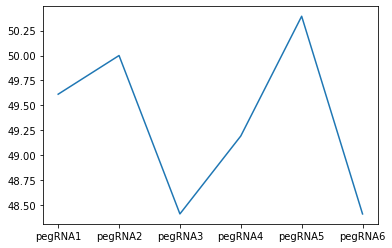

In [84]:
plt.plot(["pegRNA1","pegRNA2","pegRNA3","pegRNA4","pegRNA5","pegRNA6"],[GC_content(pegRNA1.upper()),GC_content(pegRNA2.upper()),GC_content(pegRNA3.upper()),GC_content(pegRNA4.upper()),GC_content(pegRNA5.upper()),GC_content(pegRNA6.upper())])

In [85]:
print("AT content ratio of pegRNA1:",AT_content(pegRNA1.upper()))
print("AT content ratio of pegRNA2:",AT_content(pegRNA2.upper()))
print("AT content ratio of pegRNA3:",AT_content(pegRNA3.upper()))
print("AT content ratio of pegRNA4:",AT_content(pegRNA4.upper()))
print("AT content ratio of pegRNA5:",AT_content(pegRNA5.upper()))
print("AT content ratio of pegRNA6:",AT_content(pegRNA6.upper()))

AT content ratio of pegRNA1: 50.3875968992248
AT content ratio of pegRNA2: 50.0
AT content ratio of pegRNA3: 51.587301587301596
AT content ratio of pegRNA4: 50.806451612903224
AT content ratio of pegRNA5: 49.60629921259843
AT content ratio of pegRNA6: 51.587301587301596


In [86]:
alignment1= pairwise2.align.globalxx(pegRNA1,target1_mutation_sequence)
alignment2= pairwise2.align.globalxx(pegRNA2,target1_mutation_sequence)
alignment3= pairwise2.align.globalxx(pegRNA3,target1_mutation_sequence)
alignment4= pairwise2.align.globalxx(pegRNA4,target1_mutation_sequence)
alignment5= pairwise2.align.globalxx(pegRNA5,target1_mutation_sequence)
alignment6= pairwise2.align.globalxx(pegRNA6,target1_mutation_sequence)

In [87]:
print(alignment1[0])

Alignment(seqA='-A----G------CC------CC-----G----G-------T-------G--A---GGAAA-----G----------C-G-GT--T-TT----A--G----A---G-CTAG-------A-AAT-----------A-G----C-----A-----A------G---T--------T--A---A-A-A-------T-A-A---G-----G-----CT----A-G--TCC-G------TT------ATC-------------A-A-----CTT-----GAAA---A-A-GT-----G---G--C---AC----C-----------GA--G---T------C--------G------------G----T-GCT-T-G-A--------G---------G--ACT-TtC---C--CC-G--C--T-T--T--CC-----T-----C-------AC-C----G-G-----GG---------C---------------TT--------------------------------------------------------------------', seqB='CATTTAGTAATGACCTTGAGGCCACACTGCTTTGAAGAAAATAAACTATGTTAACAGGAAAATCCAGAATTTGTAGGCTGAGTGGTGTTTGGGACAGTTGTATTAGGCT-GGCGTTGGACAATTGCTCTCTGGGAAGGTGGCTGCTTATGGTCATTTATAGAGGTGGGGAGCATTTAGGGAGAGAGCGACCCTGAGAACAGTCACAGATTGGCTTTTTAAGAATCCTGGGAGAGTTGTCTTCATCTCCCTGTGCCCCCATAGTAAGCTTCCTTTGAAACTGACATGTTCAATGTTTGTTCTGCACAGTTCTTTATCAACAAGACTGAGATTGAGGACTT*cCCCCGCTTTCCTCAC*tGGGGCTTGCTGTTGGATACATCTCGCCATTACCTGCCACTCT-CTAGCATCCTGGACA

In [88]:
print(alignment2[0])

Alignment(seqA='-A----G------CC------CC-----G----G-------T-------G--A---GGAAA-----G----------C-G-G-G-T-TTT---A--G----A---G-CTAG-------A-AAT-----------A-G----C-----A-----A------G---T--------T--A---A-A-A-------T-A-A---G-----G-----CT----A-G--TCC-G------TT------ATC-------------A-A-----CTT-----GAAA---A-A-GT-----G---G--C---AC----C-----------GA--G---T------C--------G------------G----T-GCT-T-G-A--------G---------G--ACT-T-Tc--C--CC-G--C--T-T--T--CC-----T-----C-------AC-C----G-G-----GG---------C---------------TT--------------------------------------------------------------------', seqB='CATTTAGTAATGACCTTGAGGCCACACTGCTTTGAAGAAAATAAACTATGTTAACAGGAAAATCCAGAATTTGTAGGCTGAGTGGTGTTTGGGACAGTTGTATTAGGCT-GGCGTTGGACAATTGCTCTCTGGGAAGGTGGCTGCTTATGGTCATTTATAGAGGTGGGGAGCATTTAGGGAGAGAGCGACCCTGAGAACAGTCACAGATTGGCTTTTTAAGAATCCTGGGAGAGTTGTCTTCATCTCCCTGTGCCCCCATAGTAAGCTTCCTTTGAAACTGACATGTTCAATGTTTGTTCTGCACAGTTCTTTATCAACAAGACTGAGATTGAGGACTT*cCCCCGCTTTCCTCAC*tGGGGCTTGCTGTTGGATACATCTCGCCATTACCTGCCACTCTCT-AGCATCCTGGACA

In [89]:
print(alignment3[0])

Alignment(seqA='-A---AG------CC------CCG-----G-T--GA-G------------G--AA-AGtG--------G--TTT-TAG----AG------------C--T---A---G-----------A-AAT-----------A-G----C-----A-----A------G---T--------T--A---A-A-A-------T-A-A---G-----G-----CT----A-G--TCC-G------TT------ATC-------------A-A-----CTT-----GAAA---A-A-GT-----G---G--C---AC----C-----------GA--G---T------C--------G------------G----T-GCTG----A--C-T-T-----T--CC--CCg-CT-T-T--C--C-T---CAC-C-GG------GGC-TT-----------------------------------------------------------------------------------------------------------------------------', seqB='CATTTAGTAATGACCTTGAGGCC-ACACTGCTTTGAAGAAAATAAACTATGTTAACAG-GAAAATCCAGAATTTGTAGGCTGAGTGGTGTTTGGGACAGTTGTATTAGGCTGGCGTTGGACAATTGCTCTCTGGGAAGGTGGCTGCTTATGGTCATTTATAGAGGTGGGGAGCATTTAGGGAGAGAGCGACCCTGAGAACAGTCACAGATTGGCTTTTTAAGAATCCTGGGAGAGTTGTCTTCATCTCCCTGTGCCCCCATAGTAAGCTTCCTTTGAAACTGACATGTTCAATGTTTGTTCTGCACAGTTCTTTATCAACAAGACTGAGATTGAGGACTT*cCCCCGCTTTCCTCAC*tGGGGCTTGCTGTTGGATACATCTCGCCATTACCTGCC-ACTCTCTAGCATCCTGGA

In [90]:
print(alignment4[0])

Alignment(seqA='-A---AG------CC------CCG-----G-T--GA-G------------G--AAc--G------C--G--TTT-TAG----AG------------C--T---A---G-----------A-AAT-----------A-G----C-----A-----A------G---T--------T--A---A-A-A-------T-A-A---G-----G-----CT----A-G--TCC-G------TT------ATC-------------A-A-----CTT-----GAAA---A-A-GT-----G---G--C---AC----C-----------GA--G---T------C--------G------------G----T-GCT-----A--C-T-T-----T--CC--CC--------GCt-T--T---C-CTC----A-CC-GG------GGC-TT---------------------------------------------------------------------------------------------------------------------', seqB='CATTTAGTAATGACCTTGAGGCC-ACACTGCTTTGAAGAAAATAAACTATGTTAA-CAGGAAAATCCAGAATTTGTAGGCTGAGTGGTGTTTGGGACAGTTGTATTAGGCTGGCGTTGGACAATTGCTCTCTGGGAAGGTGGCTGCTTATGGTCATTTATAGAGGTGGGGAGCATTTAGGGAGAGAGCGACCCTGAGAACAGTCACAGATTGGCTTTTTAAGAATCCTGGGAGAGTTGTCTTCATCTCCCTGTGCCCCCATAGTAAGCTTCCTTTGAAACTGACATGTTCAATGTTTGTTCTGCACAGTTCTTTATCAACAAGACTGAGATTGAGGACTT*cCCCCGCTTTCCTCAC*tGGGGCTTGCTGTTGGATACATCTCGCCATTACCTGCCACTCTCTAGC-ATCCTGGA

In [91]:
print(alignment5[0])

Alignment(seqA='C------------C---G---C-----T--TT-------------C--------C-------TC-A-----------C----------------C-G--G-----GGCT----Tt-GG----TT--T-T-----A-G----------A-G--C-T--A--GA-------A--AT--AG--------C-A-----AG-----T------T---------AA-AAT------A-AG--G-CT--A-------GT-CC------GT----T-------A---T--CA-----A---------CT------T-------------GA---A-A---A--A---------G-T----------GG--C----------A--C--C--G--A------G----TC----G------G-----T--G----C------T-A-G-C-------A-A-----G----C-------------C--C---Cg-G------T--------------GAG---GA-A---A--G------C-GGG-G---------A---------------', seqB='CATTTAGTAATGACCTTGAGGCCACACTGCTTTGAAGAAAATAAACTATGTTAACAGGAAAATCCAGAATTTGTAGGCTGAGTGGTGTTTGGGACAGTTGTATTAGGCTGGCGT-TGGACAATTGCTCTCTGGGAAGGTGGCTGCTTATGGTCATTTATAGAGGTGGGGAGCATTTAGGGAGAGAGCGACCCTGAGAACAGTCACAGATTGGCTTTTTAAGAATCCTGGGAGAGTTGTCTTCATCTCCCTGTGCCCCCATAGTAAGCTTCCTTTGAAACTGACATGTTCAATGTTTGTTCTGCACAGTTCTTTATCAACAAGACTGAGATTGAGGACTT*cCCCCGCTTTCCTCAC*tGGGGCTTGCTGTTGGATACATCTCGCCATTACCTGCCACTCTCTAGCATCCTGGACAC

In [92]:
print(alignment6[0])

Alignment(seqA='--TTT--------CC------CC-----GCTTT------------C--------C-------TC-A-----------C----------------Ca-GTT-T-T-AG-----------A-----GCT-------A-G----------A-----A---ATAG----------CA---AG--------------T--------T-A-A-A----------A----T------A-AG--G-CT--A-------GT-CC------GT----T-------A---T--CA-----A---------CT------T-------------GA---A-A---A--A---------G-T----------GG--C----------A--C--C--G--A------G----TC----G------G-----T--G----C------T-A---C-------A-------G----C-A-----A-G---C--C---Cc-G-----GT--------------GAG---GA-A---A--G------C-GGG-G---------A---------------', seqB='CATTTAGTAATGACCTTGAGGCCACACTGCTTTGAAGAAAATAAACTATGTTAACAGGAAAATCCAGAATTTGTAGGCTGAGTGGTGTTTGGGAC-AGTTGTATTAGGCTGGCGTTGGACAATTGCTCTCTGGGAAGGTGGCTGCTTATGGTCATTTATAGAGGTGGGGAGCATTTAGGGAGAGAGCGACCCTGAGAACAGTCACAGATTGGCTTTTTAAGAATCCTGGGAGAGTTGTCTTCATCTCCCTGTGCCCCCATAGTAAGCTTCCTTTGAAACTGACATGTTCAATGTTTGTTCTGCACAGTTCTTTATCAACAAGACTGAGATTGAGGACTT*cCCCCGCTTTCCTCAC*tGGGGCTTGCTGTTGGATACATCTCGCCATTACCTGCCACTCTCTAGCATCCTGGACAC